In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Definiendo una funcion de costos dependiendo de X,Y y el grado n del polinomio 

In [56]:
def cost_train_data(x, y, n=1):
    # Initialize an empty list to store the polynomial features
    datax = []

    # Generate polynomial features from x
    for i in range(n+1):
        datax.append(x**i)

    # Stack the list vertically and transpose it to get the design matrix X
    X = np.vstack(datax).T

    # Calculate the dot product of X transpose and X
    XTX = X.T @ X

    # Calculate the dot product of X transpose and y
    XTy = X.T @ y

    # Calculate the inverse of XTX
    invXTX = np.linalg.inv(XTX)

    # Calculate the weights by multiplying invXTX and XTy
    w = invXTX @ XTy

    # Calculate the residuals (the differences between the observed and predicted values)
    residuals = X @ w - y

    # Calculate the cost as the sum of the squared residuals
    cost = np.sum(residuals**2)

    return cost

In [57]:
# Load the dataset
data = np.loadtxt('/home/brianbg/Documents/ML2023/olympic100m_men.txt', delimiter=',').T

# Normalize the years
x = data[0]
x = (x-1896)/4

# Get the times
y = data[1]

# Create an auxiliary array with 250 evenly spaced values between the minimum and maximum years
x_aux = np.linspace(np.min(x), np.max(x), 250)

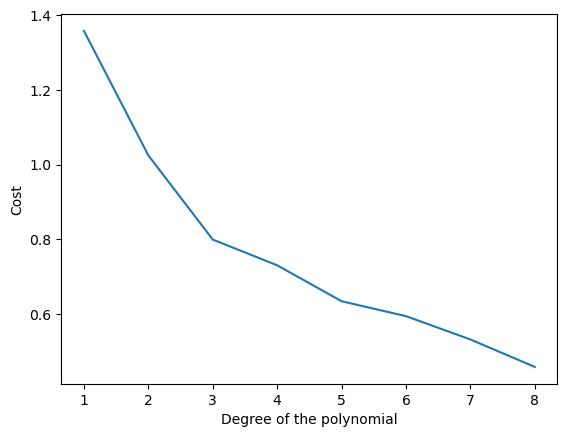

In [58]:
# Initialize an empty list to store the costs
costs = []

# Calculate the cost for different degrees of the polynomial
for n in range(1, 9):
    cost = cost_train_data(x, y, n)
    costs.append(cost)

# Plot the cost against the degree
plt.plot(range(1, 9), costs)
plt.xlabel('Degree of the polynomial')
plt.ylabel('Cost')
plt.show()

In [59]:
def cost_validation(x, y, weights):
    # Calculate the predictions
    predictions = np.polyval(weights[::-1], x)
    
    # Calculate the cost
    cost = np.sum((predictions - y)**2)
    
    return cost

In [60]:
def weight_model(x, y, n=1):
    # Generate polynomial features and fit the model
    weights = np.polyfit(x, y, n)
    
    return weights

In [61]:
def poly(x, weights):
    # Calculate the predicted values
    y_p = np.polyval(weights[::-1], x)
    
    return y_p

In [62]:
def cost_validation(x, y, weights):
    predictions = np.dot(np.vander(x, len(weights)), weights)
    return np.sum((predictions - y) ** 2)

def weight_model(x, y, n=1):
    X = np.vander(x, n+1)
    return np.linalg.lstsq(X, y, rcond=None)[0]

def poly(x, weights):
    return np.dot(np.vander(x, len(weights)), weights)

In [63]:
# Split the data into training and validation sets
x_train = x[:int(len(x)*0.8)]
y_train = y[:int(len(y)*0.8)]
x_val = x[int(len(x)*0.8):]
y_val = y[int(len(y)*0.8):]

# Initialize an empty list to store the costs
costs = []


In [64]:
print(x_train)

[ 0.   1.   2.   2.5  3.   4.   6.   7.   8.   9.  10.  13.  14.  15.
 16.  17.  18.  19.  20.  21.  22. ]


Usamos el logaritmo debido a que los valores del costo de validación son muy altos

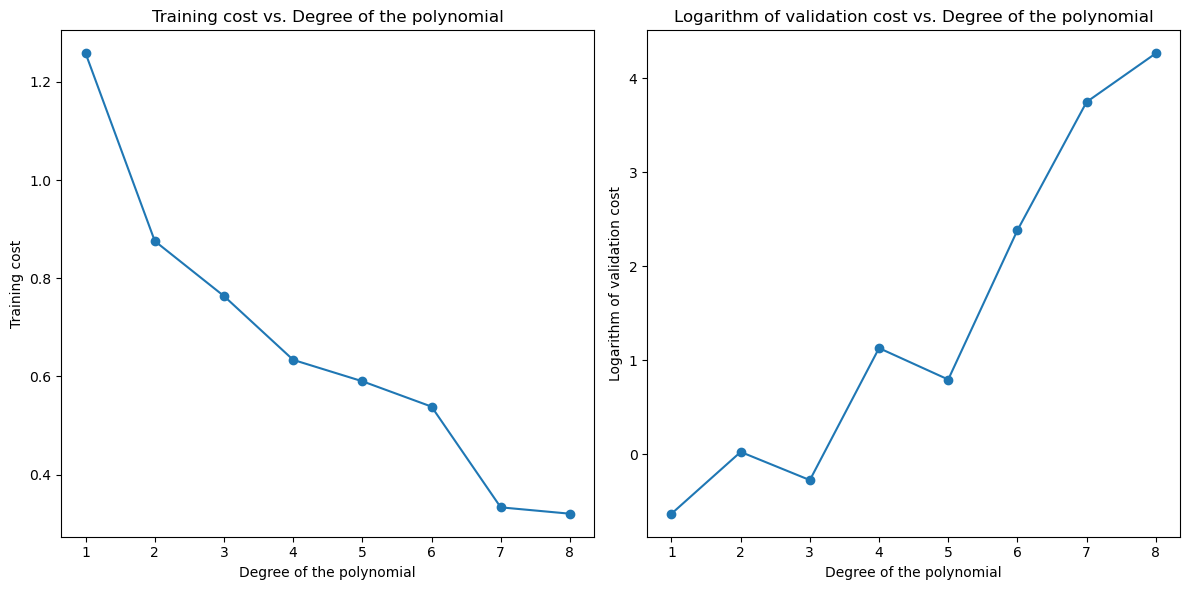

In [65]:
# Initialize two empty lists to store the training and validation costs
train_costs = []
val_costs = []

# Calculate the weights and costs for different degrees of the polynomial
for n in range(1, 9):
    weights = weight_model(x_train, y_train, n)
    train_cost = cost_train_data(x_train, y_train, n)
    val_cost = cost_validation(x_val, y_val, weights)
    #print(f'Degree: {n}, Weights: {weights}, Training Cost: {train_cost}, Validation Cost: {val_cost}')
    train_costs.append(train_cost)
    val_costs.append(val_cost)

# Plot the training cost against the degree
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 9), train_costs, 'o-')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Training cost')
plt.title('Training cost vs. Degree of the polynomial')

# Plot the logarithm of the validation cost against the degree
plt.subplot(1, 2, 2)
plt.plot(range(1, 9), np.log10(val_costs), 'o-')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Logarithm of validation cost')
plt.title('Logarithm of validation cost vs. Degree of the polynomial')

plt.tight_layout()
plt.show()

Hacemos una función que calcula el LOOCV (cross validation) para un grado n 

In [66]:
def loocv_cost(x, y, degree):
    N = len(y)
    costs = []
    
    for i in range(N):
        x_train = np.concatenate((x[:i], x[i+1:]))
        y_train = np.concatenate((y[:i], y[i+1:]))
        x_val = x[i]
        y_val = y[i]
        
        weights = weight_model(x_train, y_train, degree)
        y_pred = poly(x_val, weights)
        cost = (y_val - y_pred)**2
        costs.append(cost)
    
    return np.mean(costs)

In [67]:
def leave_one_out_cross_validation(x, y, n):
    samples = len(x)
    
    # Use list comprehension to calculate costs for each sample
    costs = [cost_validation(x[i], y[i], weight_model(np.delete(x, i), np.delete(y, i), n)) for i in range(samples)]
    
    # Return the average cost
    return np.mean(costs)

In [69]:
# Initialize an empty list to store the costs
loocv_costs = []
#x = x.flatten()
#x = np.array(x)

# Calculate the LOOCV cost for different degrees of the polynomial
for n in range(1, 9):
    cost = loocv_cost(x, y, n)
    loocv_costs.append(cost)

# Plot the logarithm of the LOOCV cost against the degree
plt.plot(range(1, 9), np.log10(loocv_costs), 'o-')
plt.xlabel('Degree of the polynomial')
plt.ylabel('Logarithm of LOOCV cost')
plt.title('Logarithm of LOOCV cost vs. Degree of the polynomial')
plt.show()

ValueError: x must be a one-dimensional array or sequence.